<a href="https://colab.research.google.com/github/sk3271/Walmart-sales-prediction/blob/main/Walmart_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# >>> WALMART SALES FORCASTING <<<


---

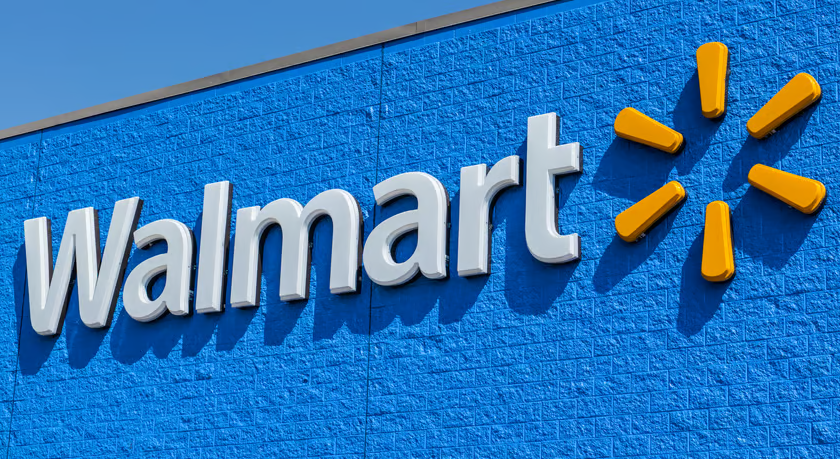








> Problem:

---




There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

> Aim:
---
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.



> ABOUT DATASET :
---
It contains historic weekly sales information about 45 Walmart stores across different regions in the country along with
department-wide information for these stores.

The main goal of this study is going to be to predict the department-wide weekly
sales for each of these stores.
The dataset is already divided into separate training and testing data; the testing
data is identical to the training dataset apart from the weekly sales information. The
training dataset contains weekly sales information from 2010-02-05 to 2012-11-01 about
the stores and departments. It also contains a column that suggests whether a particular date falls on a holiday or not. In total, there are 4,21,570 rows in the training dataset
and 1,15,064 rows in the testing dataset.



*   Temprature : Temprature in the region
*   Fuel_Price :Cost of fuel in the region
*   CPI :The consumer price index
*   STORE: Store number 1 to 45
*   Type: Store type
*   Size : Store size
*   Dept : Department number
*   IsHoliday : Whether the week is a special holiday week



CONNECT COLAB WITH KAGGLE





> API KEY = kaggle datasets download -d aslanahmedov/walmart-sales-forecast



In [1]:
# from google.colab import files
# files.upload()

In [2]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle datasets download -d aslanahmedov/walmart-sales-forecast

In [4]:
# !unzip /content/walmart-sales-forecast.zip

#Important Libraries

In [5]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import missingno as msno # check missing values

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso

# accuracy metrics
from sklearn.metrics import r2_score



## Read Dataset

In [6]:
train_df = pd.read_csv("/content/train.csv")
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train_df.shape

(421570, 5)

In [8]:
features_df = pd.read_csv("/content/features.csv")
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features_df.shape

(8190, 12)

In [10]:
store_df = pd.read_csv("/content/stores.csv")
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
store_df.shape

(45, 3)

In [12]:
test_df = pd.read_csv("/content/test.csv")
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


### Checking missing valuus in train dataset

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

There is no missing no in train data

### checking missing values in features

In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [17]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

<Axes: >

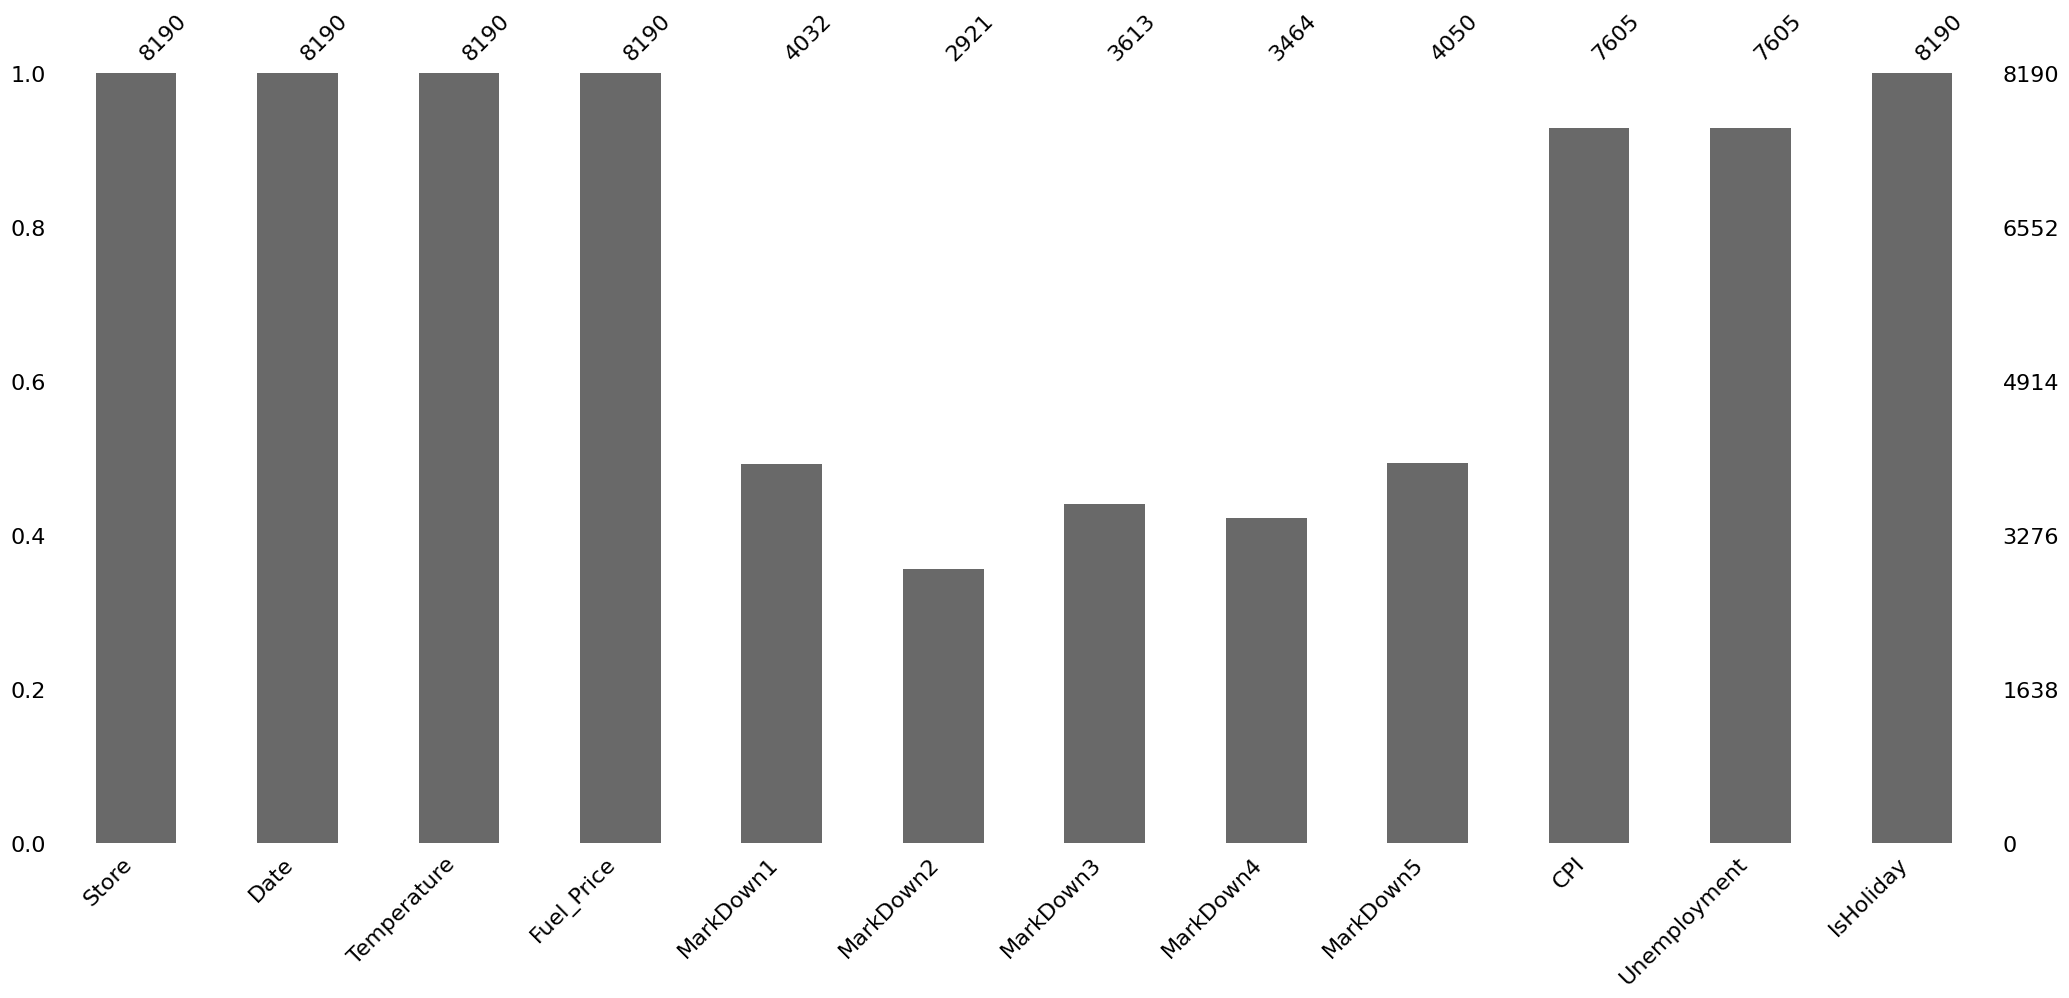

In [18]:
# visualising missing no

msno.bar(features_df)

###Checking missing values in store

In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [20]:
store_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

There is no missing no in store dataset

### Handle missing values in features df

In [21]:
# We will drop some columns becuase there is too much missing values

features_df = features_df.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis = 1)

In [22]:
# Replace missing value in Unemployement and cpi columns with mean value

features_df['Unemployment'] = features_df['Unemployment'].fillna(features_df['Unemployment'].mean())


features_df['CPI'] = features_df['CPI'].fillna(features_df['CPI'].mean())


<Axes: >

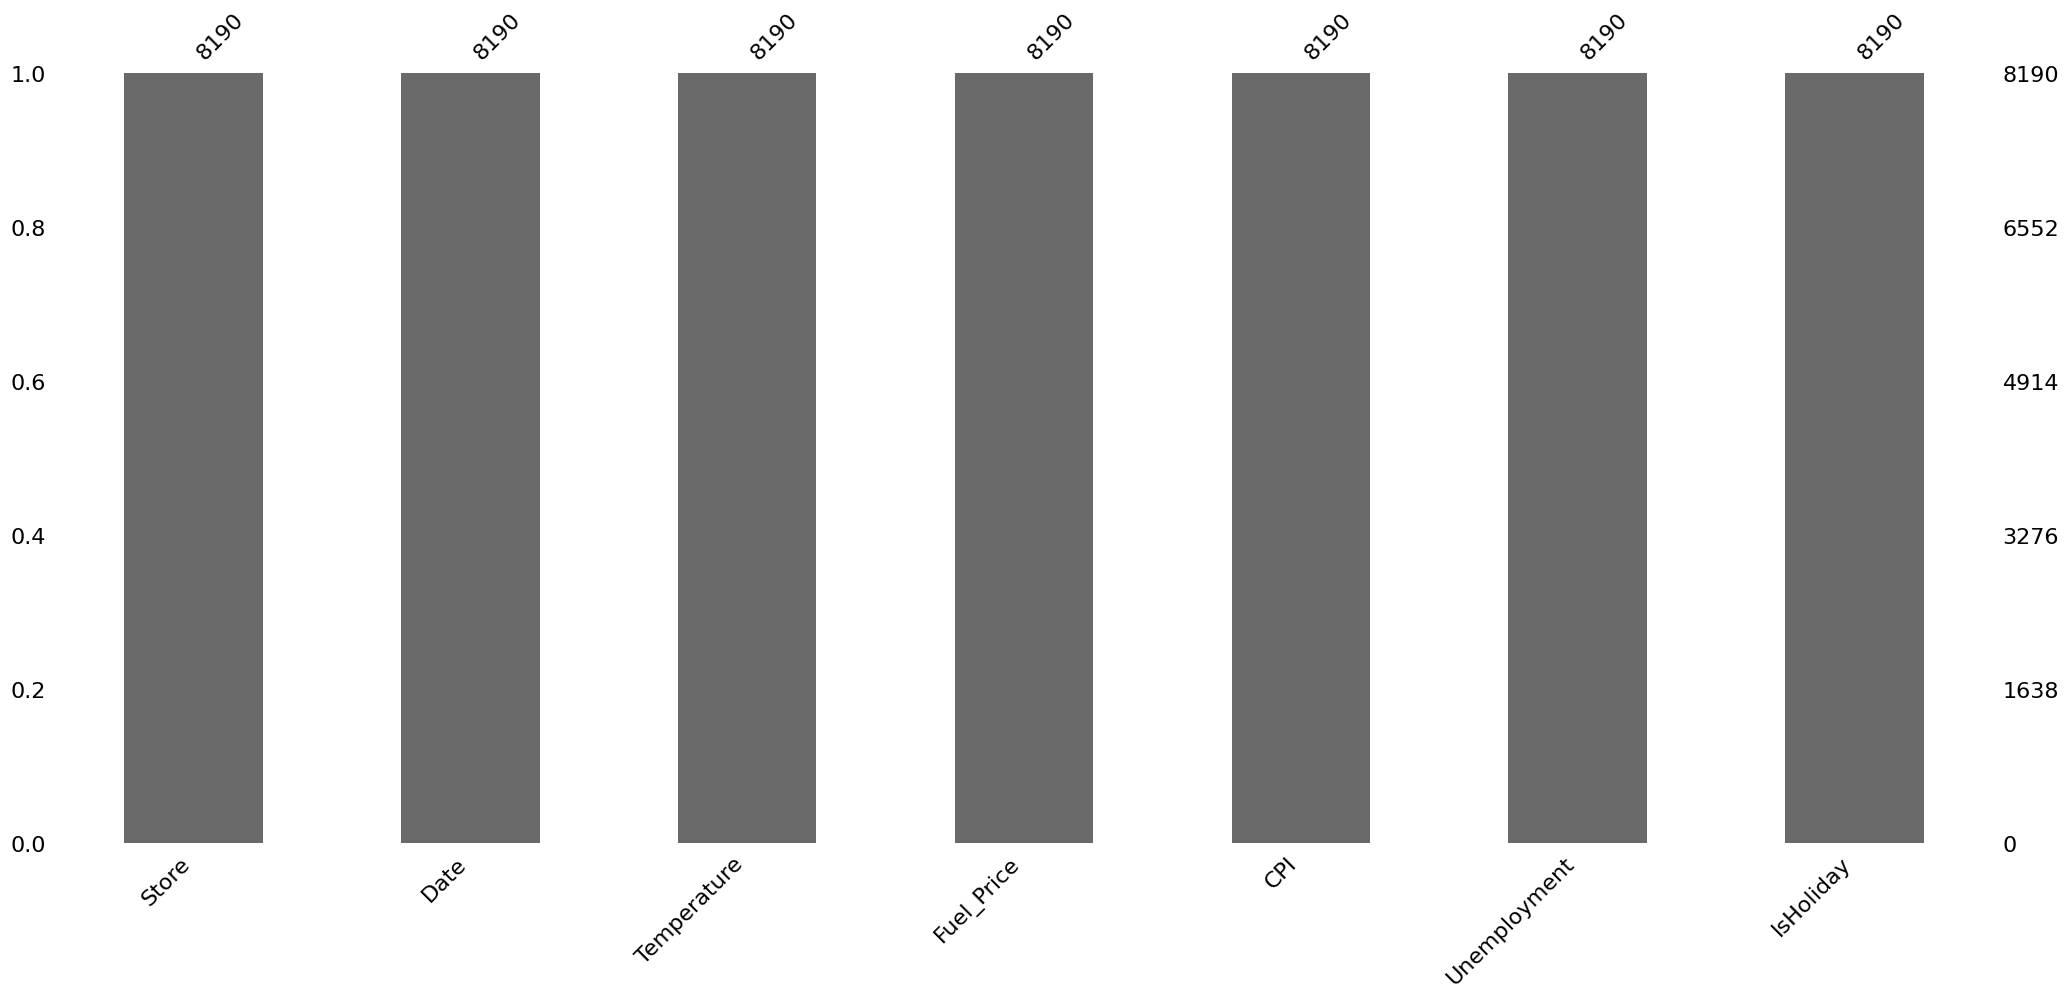

In [23]:
msno.bar(features_df)

There is no missing values in any dataset


## Merge dataframe

In [24]:
train_df = train_df.merge(store_df,how="inner").merge(features_df,how="inner")


In [25]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


In [26]:
train_df.shape

(421570, 11)

In [27]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,421570.0,NaN,NaN,NaN,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,NaN,NaN,NaN,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Date,421570,143,2011-12-23,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,421570.0,NaN,NaN,NaN,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
IsHoliday,421570,2,False,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,421570,3,A,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,421570.0,NaN,NaN,NaN,136727.915739,60980.583328,34875.0,93638.0,140167.0,202505.0,219622.0
Temperature,421570.0,NaN,NaN,NaN,60.090059,18.447931,-2.06,46.68,62.09,74.28,100.14
Fuel_Price,421570.0,NaN,NaN,NaN,3.361027,0.458515,2.472,2.933,3.452,3.738,4.468
CPI,421570.0,NaN,NaN,NaN,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807


In [28]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [29]:
train_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [30]:
train_df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65])

In [31]:
train_df['IsHoliday'].unique()

array([False,  True])

In [32]:
train_df["IsHoliday"].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [33]:
train_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [34]:
train_df["Type"].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [35]:
train_df['Date'] = pd.to_datetime(train_df.Date, format='%Y-%m-%d' )


train_df['Week'] = train_df.Date.dt.week # for the week data
train_df['Month'] = train_df.Date.dt.month # for the month data
train_df['Year'] = train_df.Date.dt.year # for the year data


<ipython-input-35-0538e6e6e09d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['Week'] = train_df.Date.dt.week # for the week data


In [36]:
train_df = train_df.drop("Date", axis=1)

In [37]:
train_df

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
2,1,3,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
3,1,4,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
4,1,5,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,10,2012
421566,45,94,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,10,2012
421567,45,95,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,10,2012
421568,45,97,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,10,2012


## EDA

<Axes: xlabel='Type', ylabel='count'>

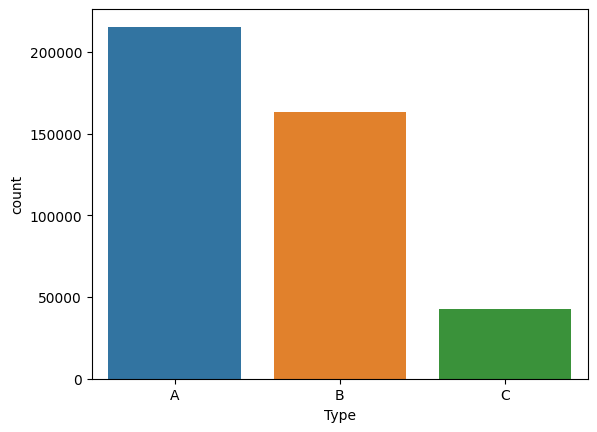

In [38]:
sns.countplot(data = train_df, x="Type")

([<matplotlib.patches.Wedge at 0x79434bc49ea0>,
 [Text(-0.03846221317427976, 1.0993273662370715, 'A'),
  Text(-0.30659668116421684, -1.0564082899613614, 'B'),
  Text(1.0450419440765444, -0.3433472515118138, 'C')],
 [Text(-0.020979389004152596, 0.5996331088565844, '51.1%'),
  Text(-0.16723455336230006, -0.5762227036152879, '38.8%'),
  Text(0.570022878587206, -0.18728031900644385, '10.1%')])

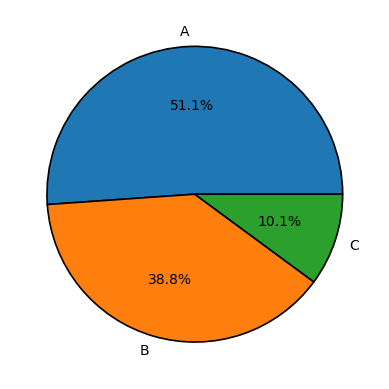

In [39]:
Type_dict = dict(train_df["Type"].value_counts())
plt.pie(Type_dict.values(),labels=Type_dict.keys(),wedgeprops={"edgecolor":"black","linewidth":1.2},autopct="%1.1f%%")

<Axes: xlabel='IsHoliday', ylabel='count'>

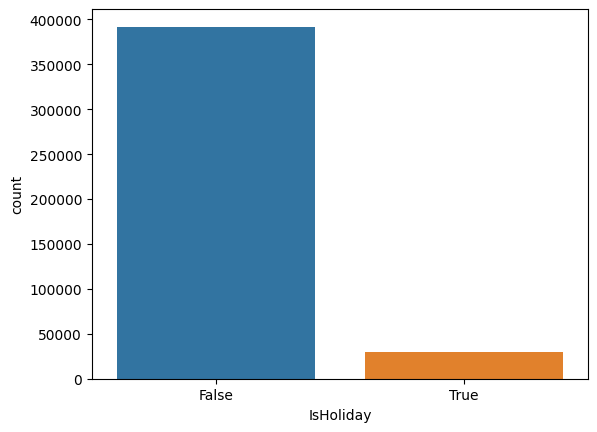

In [40]:
sns.countplot(data=train_df , x="IsHoliday")

([<matplotlib.patches.Wedge at 0x79434bb2cd60>,
 [Text(-1.0732375816130062, 0.24116611166054355, 'False'),
  Text(1.0732376041926026, -0.2411660111767879, 'True')],
 [Text(-0.5854023172434579, 0.13154515181484192, '93.0%'),
  Text(0.5854023295596014, -0.13154509700552067, '7.0%')])

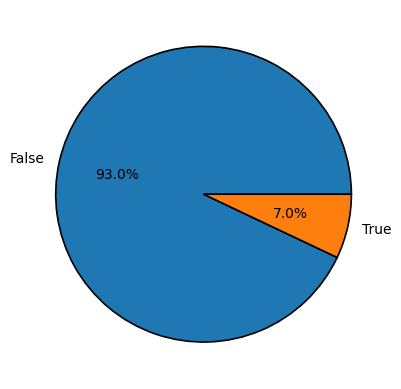

In [41]:
is_holi = dict(train_df["IsHoliday"].value_counts())
plt.pie(is_holi.values(),labels=is_holi.keys(),wedgeprops={"edgecolor":"black","linewidth":1.2},autopct="%1.1f%%")


<Axes: xlabel='Store', ylabel='count'>

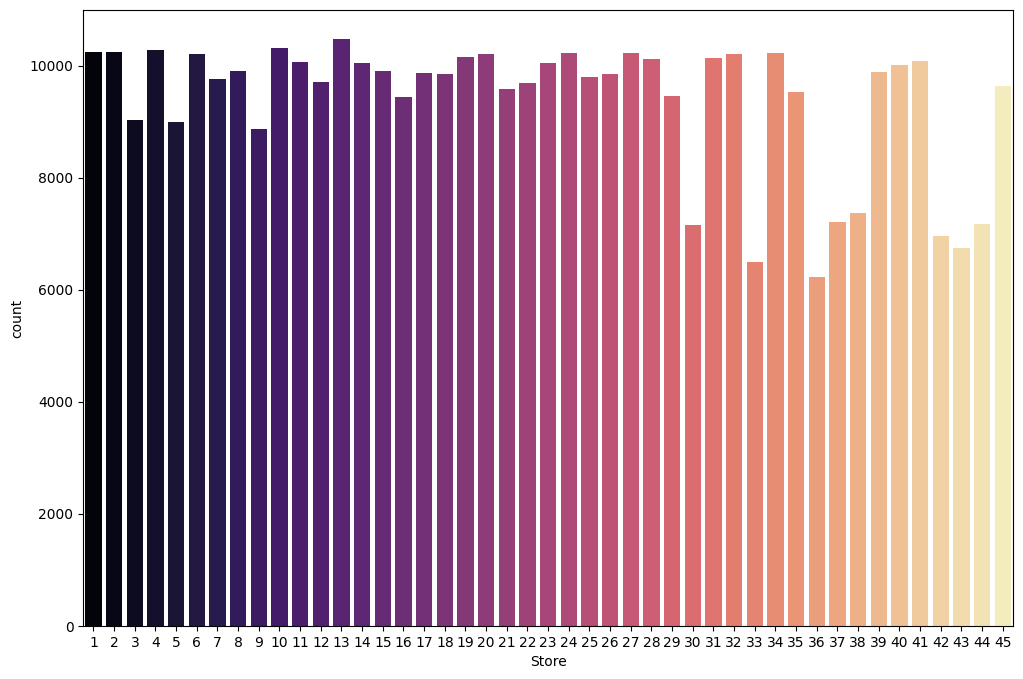

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_df , x="Store", palette = "magma")

<Figure size 2000x1000 with 0 Axes>

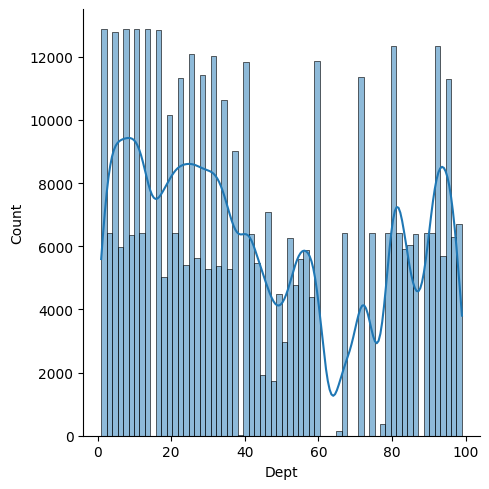

In [43]:
plt.figure(figsize=(20,10))
sns.displot(data=train_df , x="Dept", kde=True)

<Figure size 1200x1000 with 0 Axes>

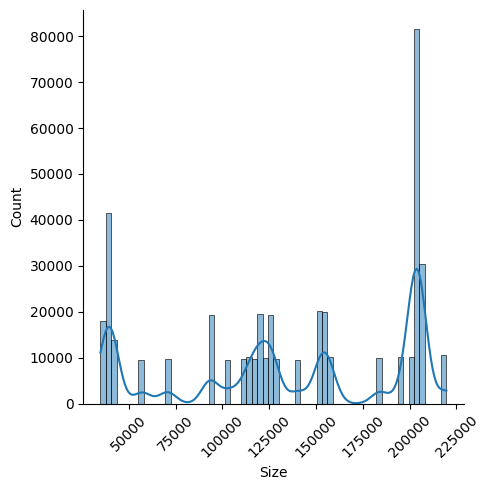

In [44]:
plt.figure(figsize=(12,10))
sns.displot(x=train_df["Size"], kde=True)
plt.xticks(rotation=45)
plt.tight_layout()

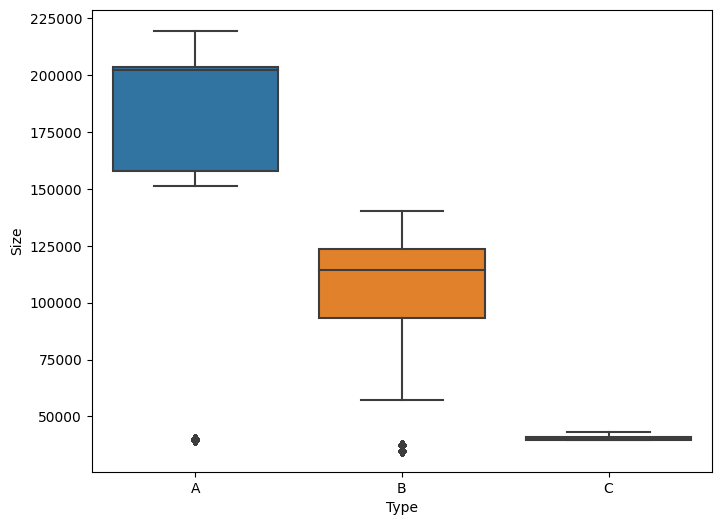

In [45]:
store_type = pd.concat([train_df['Type'], train_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

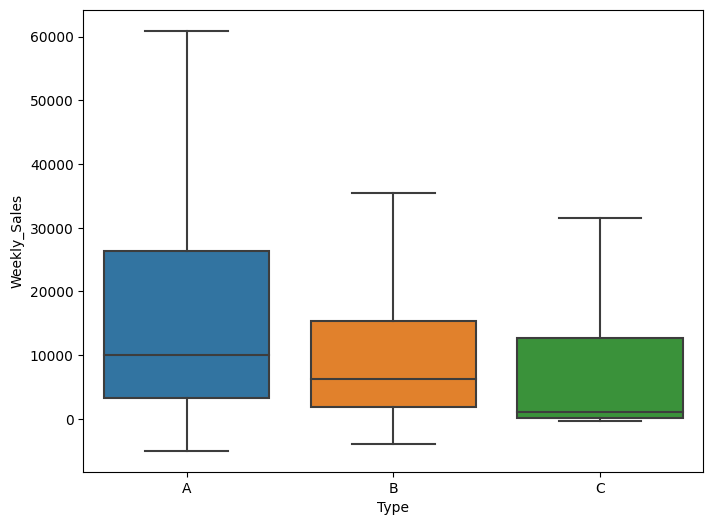

In [46]:
store_sale = pd.concat([train_df['Type'], train_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

<Axes: xlabel='Week', ylabel='count'>

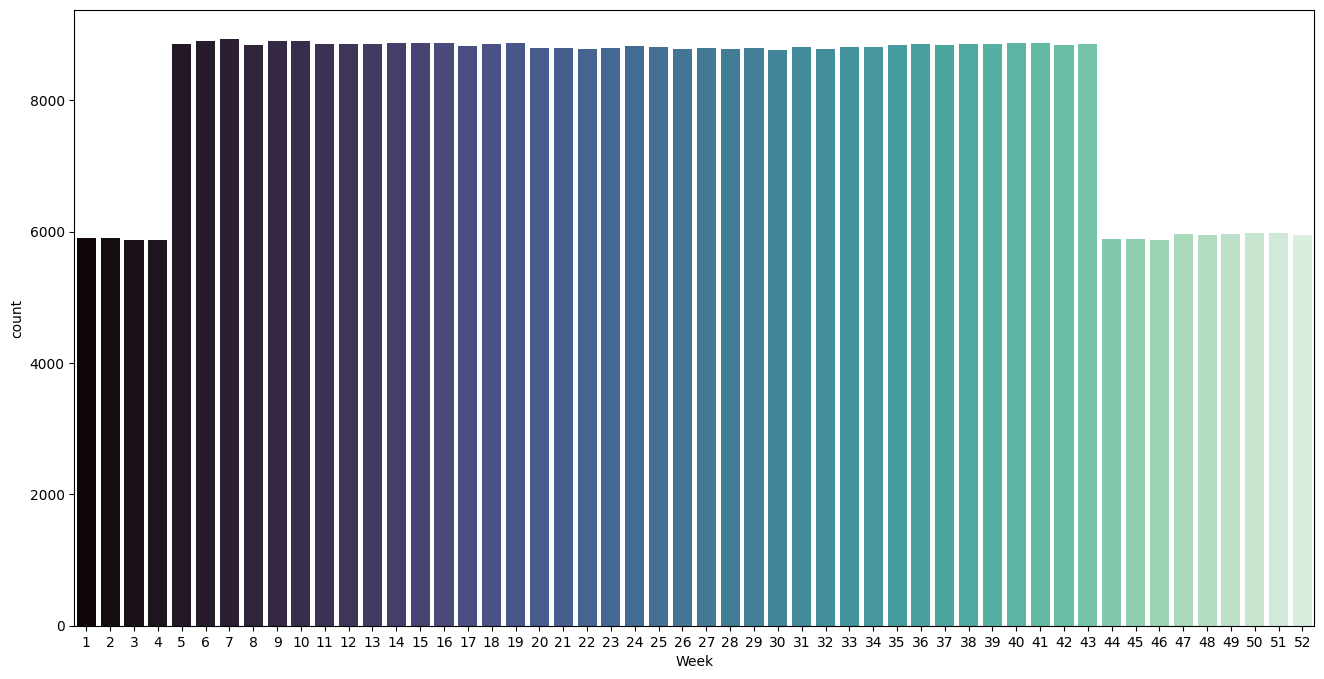

In [47]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Week"],palette="mako")

<Axes: xlabel='Month', ylabel='count'>

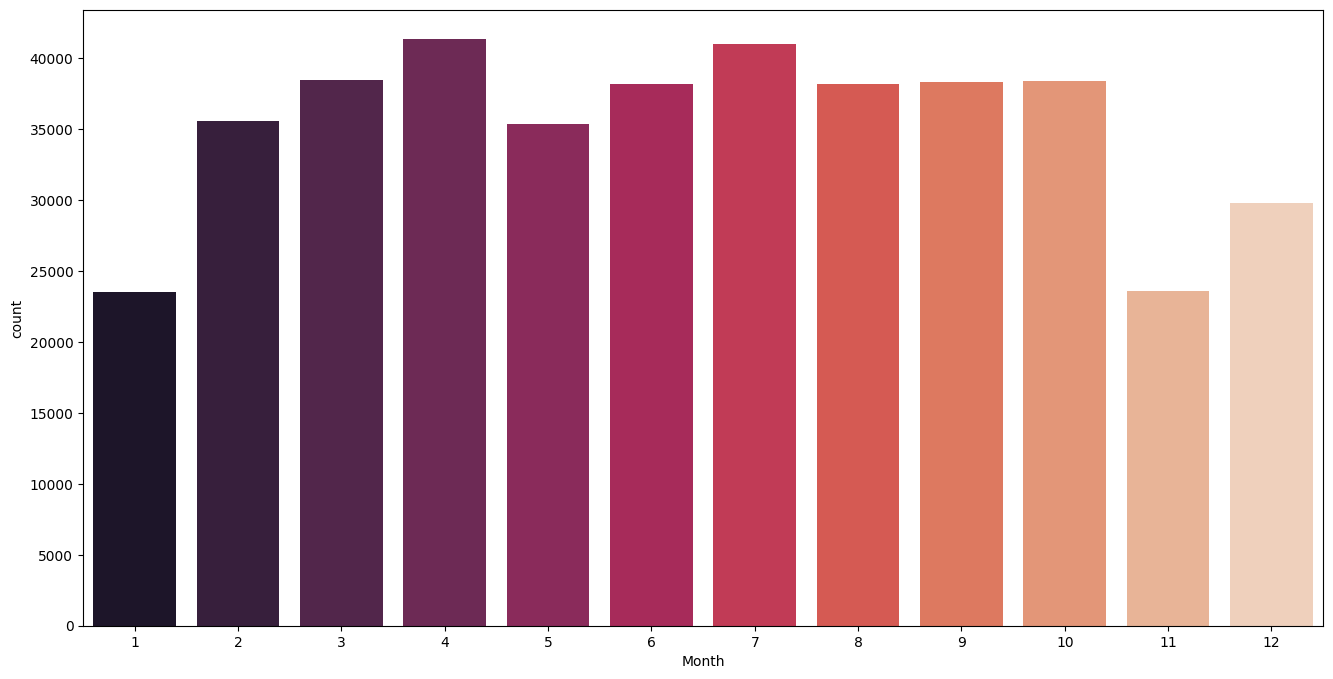

In [48]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Month"],palette="rocket")

<Axes: xlabel='Year', ylabel='count'>

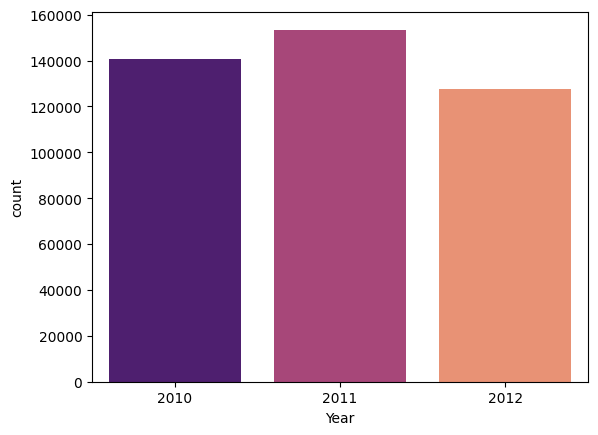

In [49]:
sns.countplot(x=train_df["Year"], palette = "magma")

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

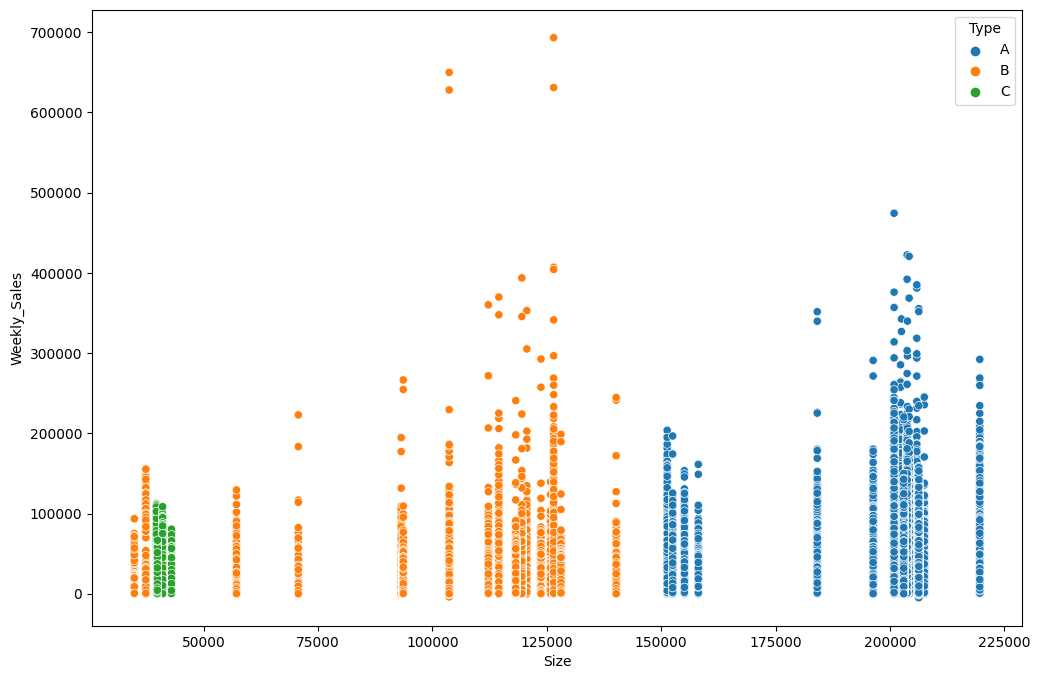

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_df["Size"],y=train_df["Weekly_Sales"],hue=train_df["Type"])

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

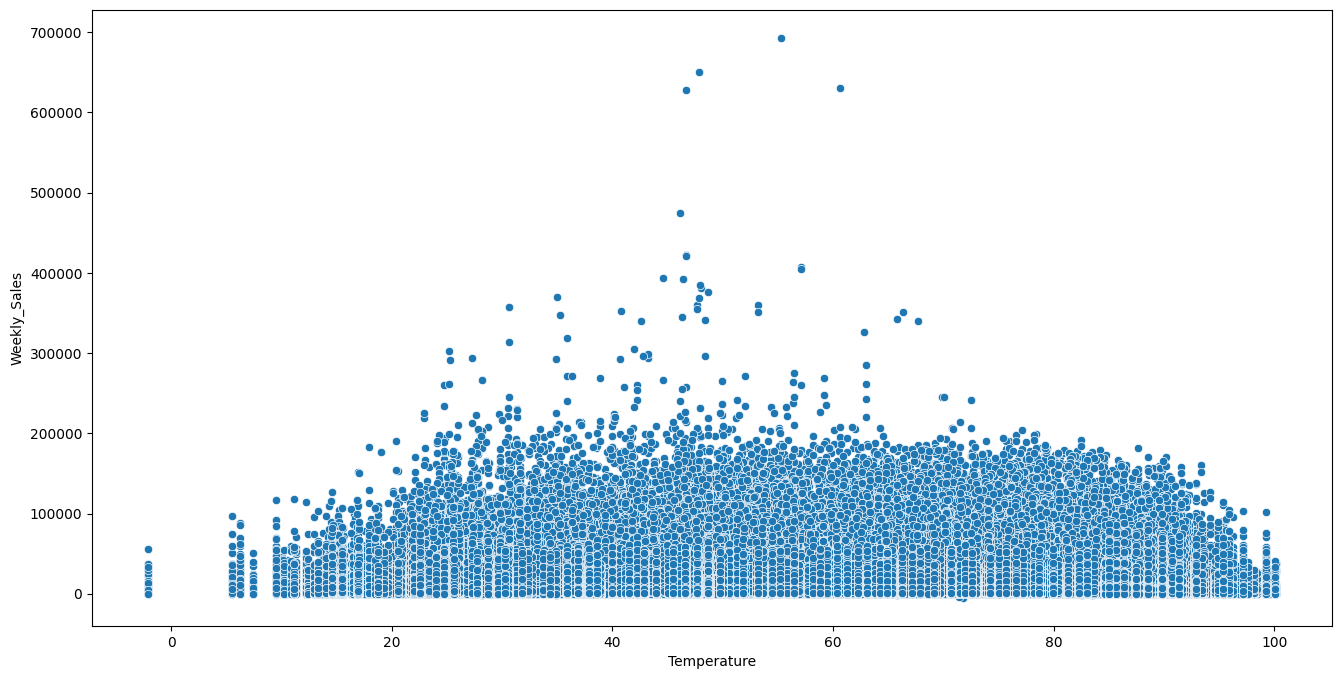

In [51]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Temperature"],y=train_df["Weekly_Sales"])

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

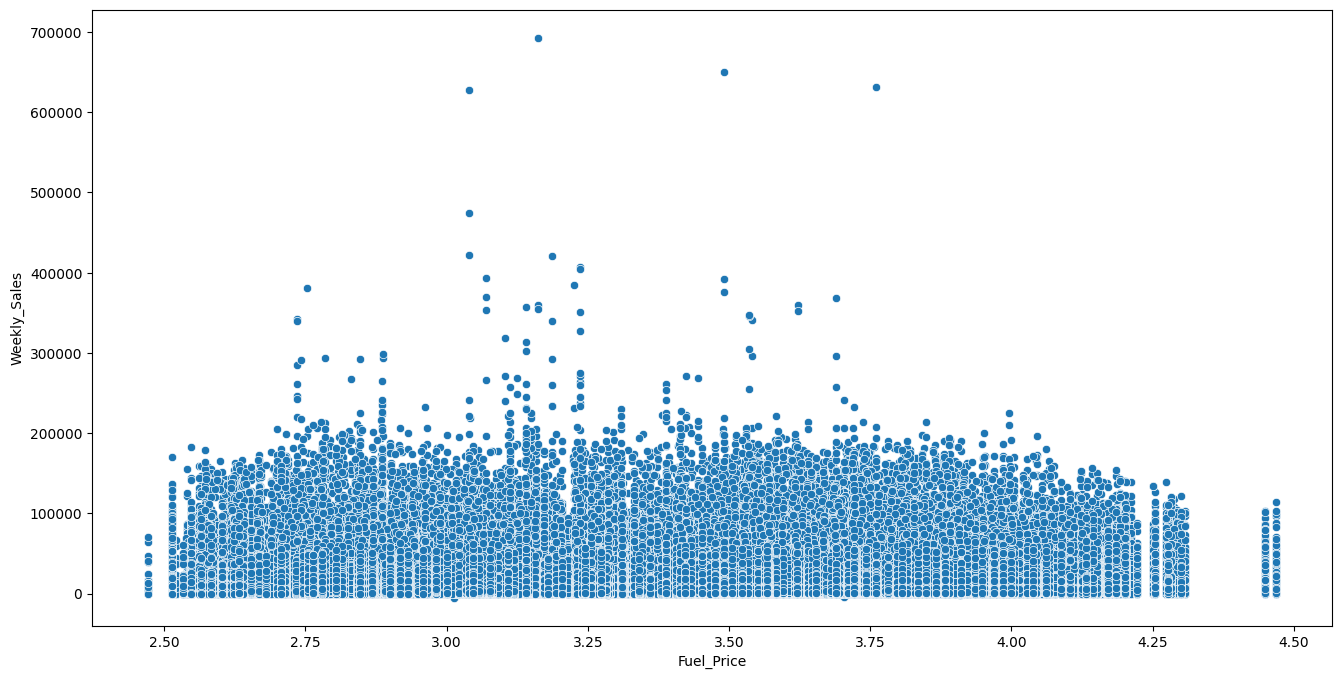

In [52]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Fuel_Price"],y=train_df["Weekly_Sales"])

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

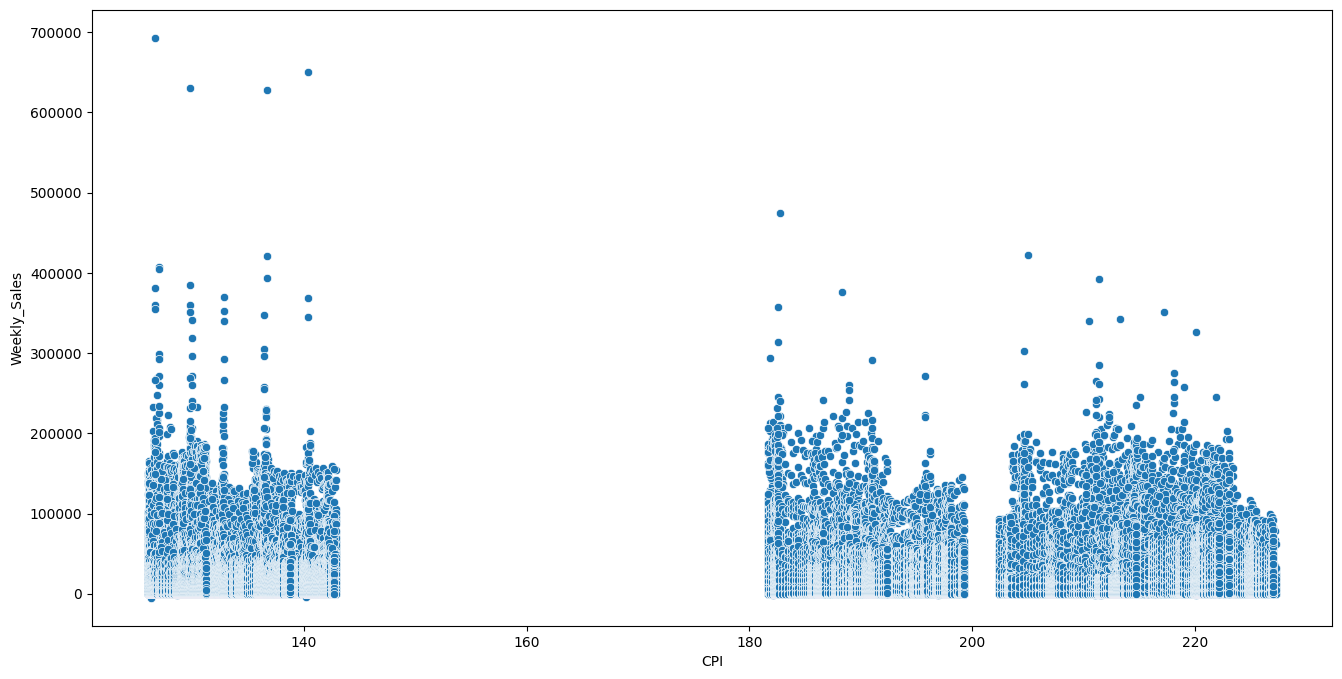

In [53]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["CPI"],y=train_df["Weekly_Sales"])

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

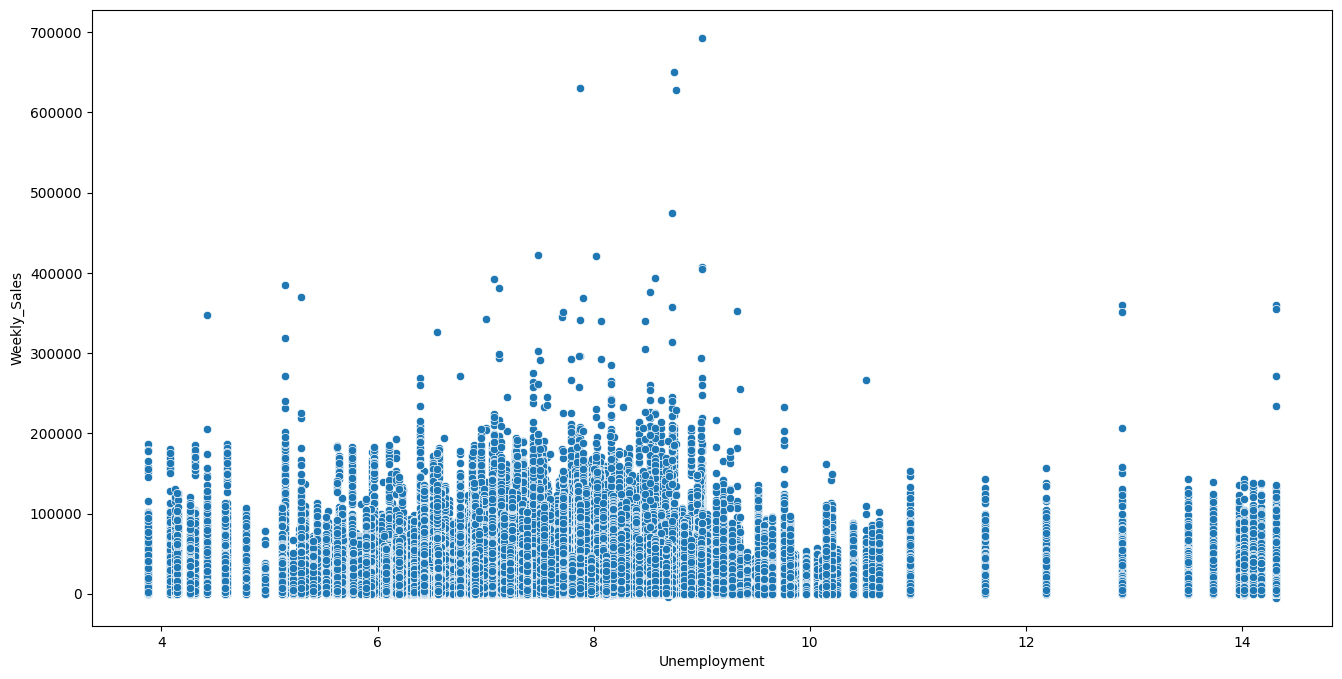

In [54]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Unemployment"],y=train_df["Weekly_Sales"])

<ipython-input-55-d14a79fd9a95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


<Axes: >

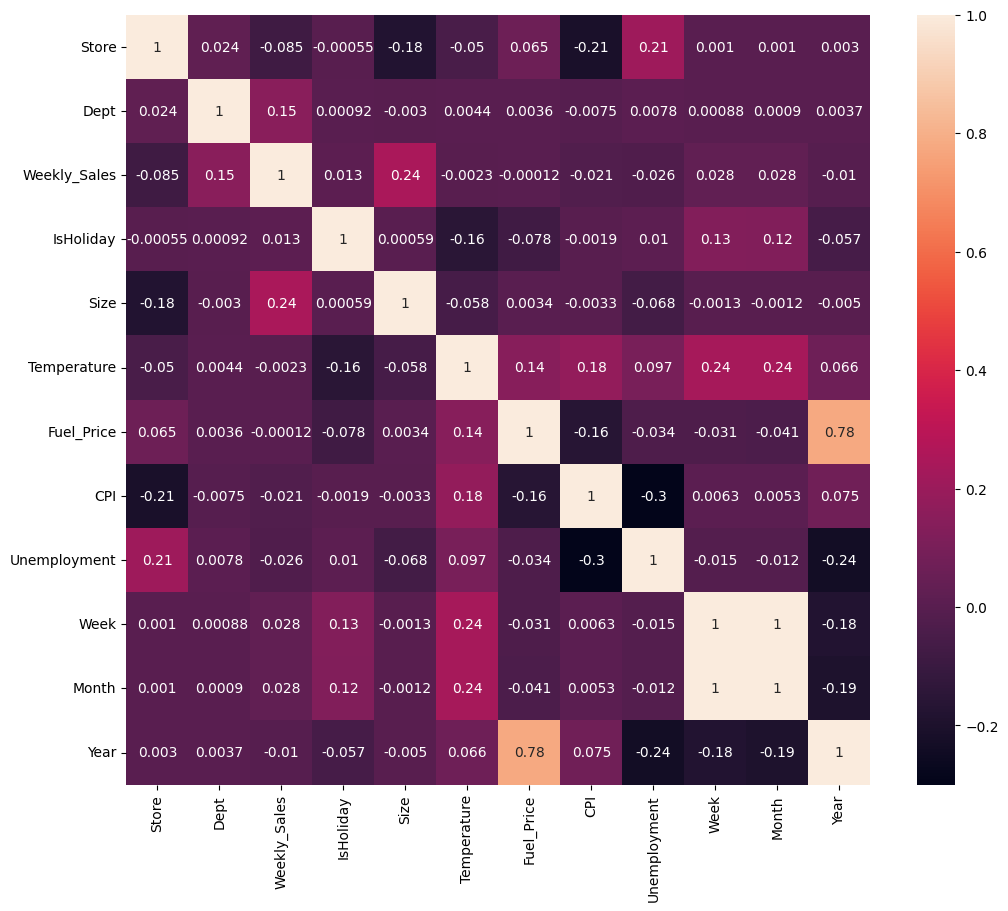

In [55]:
corr = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)


## Data Preprocessing

>convert categorical column to numrical column


In [56]:
train_df["IsHoliday"] = train_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [57]:
Type_dummies = pd.get_dummies(train_df["Type"])
train_df = pd.concat([train_df,Type_dummies],axis=1)
train_df.drop("Type",axis=1,inplace=True)

In [58]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,A,B,C
0,1,1,24924.50,0,151315,42.31,2.572,211.096358,8.106,5,2,2010,1,0,0
1,1,2,50605.27,0,151315,42.31,2.572,211.096358,8.106,5,2,2010,1,0,0
2,1,3,13740.12,0,151315,42.31,2.572,211.096358,8.106,5,2,2010,1,0,0
3,1,4,39954.04,0,151315,42.31,2.572,211.096358,8.106,5,2,2010,1,0,0
4,1,5,32229.38,0,151315,42.31,2.572,211.096358,8.106,5,2,2010,1,0,0


>Removing outliers

In [59]:
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = train_df[columns].quantile(.75)
Q1 = train_df[columns].quantile(.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 -  1.5*IQR

for column in columns:
  train_df[column] = np.where(train_df[column] > upper_limit[column], upper_limit[column],
        np.where(train_df[column] < lower_limit[column], lower_limit[column], train_df[column]))


## Model Building

In [60]:
X = train_df.drop("Weekly_Sales", axis = 1)
Y = train_df["Weekly_Sales"]

In [61]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [63]:
print("x Train Shape :",X_train.shape)
print("x test Shape   :",X_test.shape)
print("y Train Shape :",y_train.shape)
print("y test Shape   :",y_test.shape)

x Train Shape : (316177, 14)
x test Shape   : (105393, 14)
y Train Shape : (316177,)
y test Shape   : (105393,)


In [64]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

## Linear Regression

In [65]:
# Create the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# compute WMAE
train_wmae = WMAE(train_df, y_test, y_pred)
print("WMAE for Linear regression: {}.".format(train_wmae))

WMAE for Linear regression: 3714.81.


In [66]:
# checking accuracy
score = r2_score(y_test,y_pred)
print("The accuracy for linear regression model {}%".format(round(score, 2) *100))

The accuracy for linear regression model 9.0%


##Lasso regression

In [67]:
# Create the model
lasso = Lasso(alpha=0.1)

# fit the model
lasso.fit(X_train, y_train)
y_pred2 = lasso.predict(X_test)

# compute WMAE
train_wmae2 = WMAE(train_df, y_test, y_pred2)
print("WMAE for lasso regression: {}.".format(train_wmae2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+13, tolerance: 1.621e+10
  model = cd_fast.enet_coordinate_descent(


WMAE for lasso regression: 3714.78.


In [68]:
# checking accuracy
score2 = r2_score(y_test, y_pred2)
print("The accuracy for lasso regression model {}%".format(round(score2, 2) *100))

The accuracy for lasso regression model 9.0%


##Gradient Boosting

In [69]:
# Create the model
gbm = XGBRegressor()

# fit the model
gbm.fit(X_train, y_train)
y_pred3 = gbm.predict(X_test)

# compute WMAE
train_wmae3 = WMAE(train_df, y_test, y_pred3)
print("WMAE for gradient boosting: {}.".format(train_wmae3))

WMAE for gradient boosting: 783.1.


In [70]:
# checking accuracy
score3 = r2_score(y_test,y_pred3)
print("The accuracy for gradient boosting model {}%".format(round(score3, 2) *100))

The accuracy for gradient boosting model 94.0%


##Random Forest

In [71]:
# Create the model
rf1 = RandomForestRegressor()

# fit the model
rf1.fit(X_train, y_train)
y_pred4 = rf1.predict(X_test)

# compute WMAE
train_wmae4 = WMAE(train_df, y_test, y_pred4)
print("WMAE for random forest: {}.".format(train_wmae4))

WMAE for random forest: 410.05.


In [72]:
# checking accuracy
score4 = r2_score(y_test, y_pred4)
print("The accuracy for random forest regressor model {}%".format(round(score4, 2) *100))

The accuracy for random forest regressor model 97.0%


In [73]:
# predict
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

# check train and test accuracy for better understand
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

# Print accuracy
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9965430756951913
Test Accuracy: 0.9736817127789814


After applying different types of model we can say that random forest regressor is best model because it has less WMAE and it also have good accuracy with training and testing data.

> Random forest features importance

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

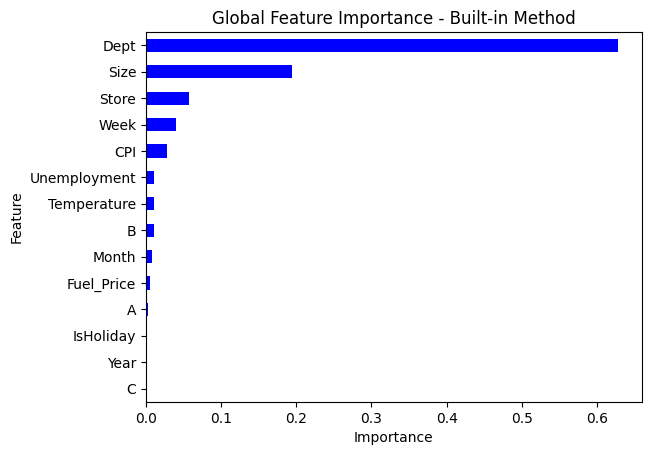

In [74]:
feature_importances = pd.Series(rf1.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

>Save model

In [77]:
pickle.dump(rf1 , open('walmart_sales_forecasting.pk1' , 'wb'))